Kaggle score: 0.76555

# Random Forest Classifier

https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), **otherwise the whole dataset is used to build each tree.**

In [2]:
# Import the basics 

import pandas as pd
import numpy as np
import sklearn
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import preprocess as pp
import plots

In [3]:
# Read & clean up data

df_raw = pd.read_csv("../data/train.csv")
df = pp.aggregated_preprocess1(df_raw)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(35)

x = df.drop("Survived", axis=1)
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_is_missing,Age_is_missing,Fare_is_missing
0,0,3,2,22.0,1,0,524,7.2500,3,17,1,0,0
1,1,1,1,38.0,1,0,597,71.2833,1,6,0,0,0
2,1,3,1,26.0,0,0,670,7.9250,3,17,1,0,0
3,1,1,1,35.0,1,0,50,53.1000,3,6,0,0,0
4,0,3,2,35.0,0,0,473,8.0500,3,17,1,0,0


In [5]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_is_missing,Age_is_missing,Fare_is_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,0.383838,2.308642,1.647587,28.583244,0.523008,0.381594,339.528620,32.674620,2.529742,14.657688,0.771044,0.198653,0.0
std,0.486592,0.836071,0.477990,13.289500,1.102743,0.806057,200.850657,49.608084,0.800254,4.678254,0.420397,0.399210,0.0
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,1.000000,4.012500,0.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,159.500000,7.925000,2.000000,17.000000,1.000000,0.000000,0.0
50%,0.000000,3.000000,2.000000,25.000000,0.000000,0.000000,338.000000,14.500000,3.000000,17.000000,1.000000,0.000000,0.0
75%,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,520.500000,31.275000,3.000000,17.000000,1.000000,0.000000,0.0
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,681.000000,512.329200,3.000000,17.000000,1.000000,1.000000,0.0


# Model Tuning 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

- `n_estimators`: number of trees
- `max_depth`: max depth of tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `min_samples_leaf`: The minimum number of samples required to be a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. _This may have the effect of smoothing the model, especially in regression._
- `min_samples_split`: The minimum number of samples required to split an internal node.


In [6]:
from sklearn.ensemble import RandomForestClassifier

grid1 = {"n_estimators": np.arange(1, 50, 5), 
         "max_depth": np.arange(10, 200, 40), 
         "min_samples_leaf": np.arange(1, 10, 2),
         "min_samples_split": np.arange(4, 60, 4)}

gs_model1 = GridSearchCV(RandomForestClassifier(), 
                        param_grid=grid1,
                        cv= 5)

gs_model1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 10,  50,  90, 130, 170]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]),
                         'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])})

In [7]:
gs_model1.best_params_

{'max_depth': 170,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 16}

In [8]:
best_score = gs_model1.score(x_test, y_test)
best_model = gs_model1

gs_model1.best_score_, best_score

(0.8272431793558553, 0.7877094972067039)

Best model selected: 

` {'max_depth': 170,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 16}`

In [21]:
grid2 = {"n_estimators": [8, 10, 12, 16, 20], 
         "max_depth": [170, 200, 220, 240], 
         "min_samples_leaf": [1,2],
         "min_samples_split": [4,6,8]}

gs_model2 = GridSearchCV(RandomForestClassifier(), 
                        param_grid=grid2,
                        cv= 5)

gs_model2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [170, 200, 220, 240],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [8, 10, 12, 16, 20]})

In [22]:
gs_model2.best_params_

{'max_depth': 200,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 20}

In [23]:
gs_model2_score = gs_model2.score(x_test, y_test)
gs_model2.best_score_, gs_model2_score

if gs_model2_score > best_score:
    best_score = gs_model2_score
    best_model = gs_model2


gs_model2.best_score_, gs_model2_score, best_score

(0.8258938244853737, 0.7988826815642458, 0.8156424581005587)

Looks like the first grid got the best resuts. 

In [26]:
y_preds = gs_model1.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       106
           1       0.73      0.75      0.74        73

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



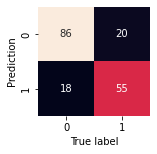

In [27]:
plots.draw_confusion_matrix(y_test, y_preds) 

# Predict the test set & convert to Kaggle

In [28]:
raw_test_df = pd.read_csv("../data/test.csv")
test_PassengerIDs = raw_test_df.PassengerId
test_df = pp.aggregated_preprocess1(raw_test_df)

In [31]:

test_preds = gs_model1.predict(test_df)

In [32]:
kaggle_data = pd.DataFrame()
kaggle_data["PassengerId"] = test_PassengerIDs
kaggle_data["Survived"] = test_preds.astype(int)
len(kaggle_data)

418

In [33]:
best_score_percent = round(best_score, 3)*100
kaggle_data.to_csv("../result-csv/RandomForest-"+str(best_score_percent)+"p_accuracy.csv", index=False)